In [22]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima import model
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\trucn\Documents\repositories\ds-mod-2-0924-code-solutions\time-series-2\AirPassengers.csv"
df = pd.read_csv(file_path, parse_dates = ['Month'], index_col = 'Month')

In [3]:
# Rename #Passengers to Pass for simplicity

df = df.rename(columns = {'#Passengers':'Pass'})

In [4]:
# Save a copy of df for future analyses
df1 = df.copy()

# 1. Use “plot_pacf” and “plot_acf” to get the “p” and “q” values respectively.

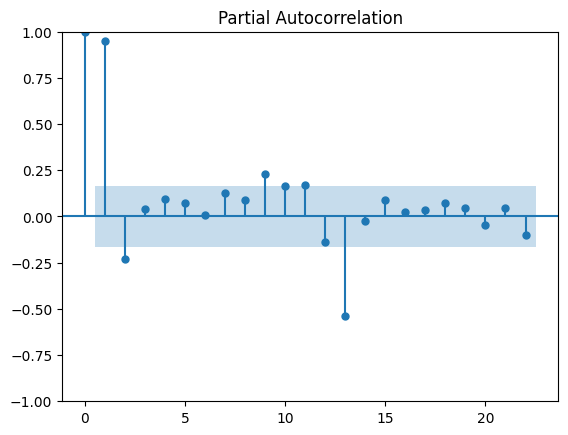

In [5]:
plot_pacf(df['Pass'].dropna());

Based on the PACF plot, since there's a sudden dropoff, p = 1.

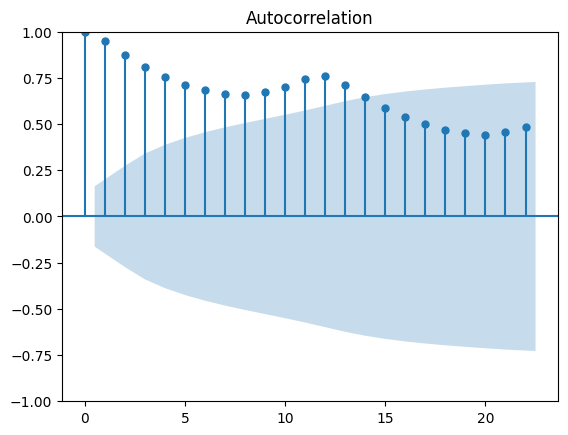

In [6]:
plot_acf(df['Pass'].dropna());

Based on the ACF plot, since there seems to be some hilliness, we can't precisely determine q.

Let's try taking the level 2 difference.

In [7]:
df['PassDiff'] = df['Pass'].diff(2)

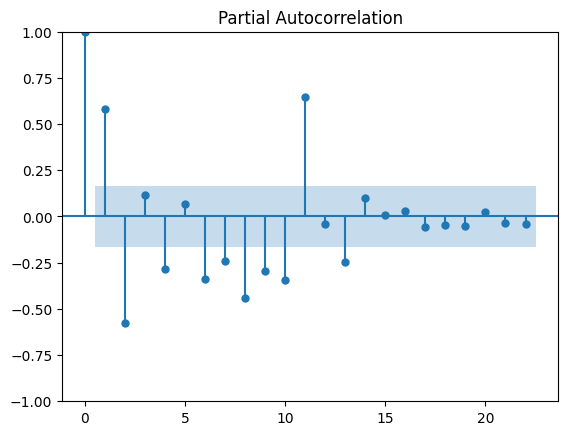

In [10]:
plot_pacf(df['PassDiff'].dropna()); 

p = 1

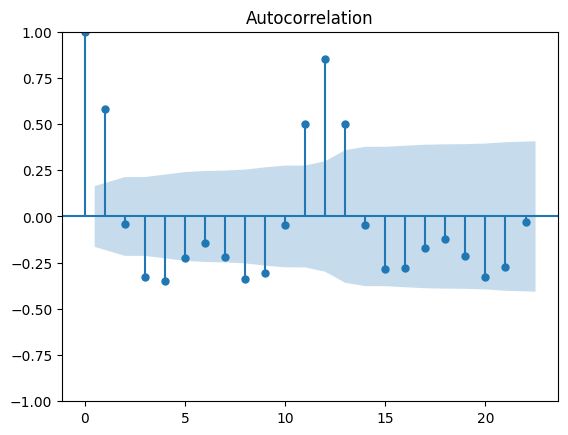

In [11]:
plot_acf(df['PassDiff'].dropna());

q = 1

Now I want to see if p and q stay the same if we take the logarithmic transformation of the data.

In [12]:
df['PassLog'] = np.log(df['Pass'])

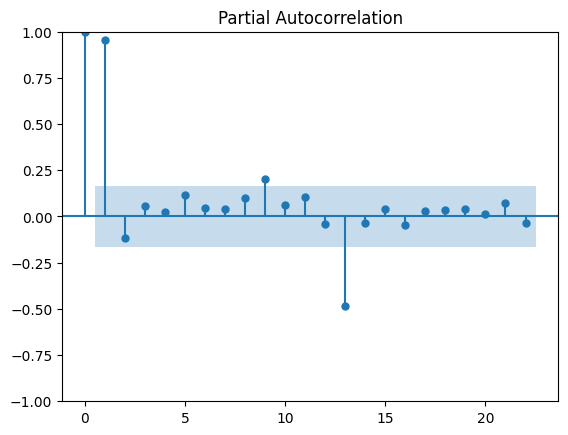

In [14]:
plot_pacf(df['PassLog'].dropna());

p = 1

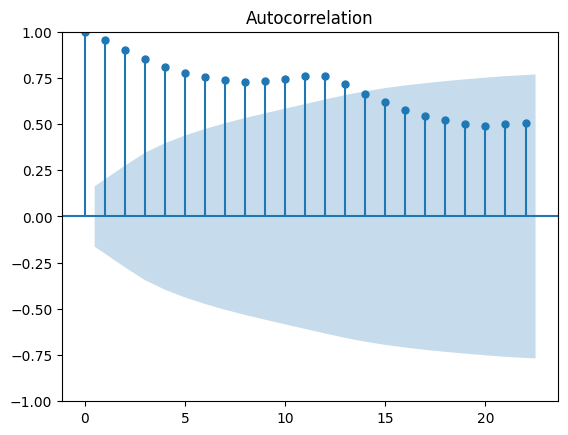

In [15]:
plot_acf(df['PassLog'].dropna());

Cannot precisely determine q.

# 2. Build an ARIMA model based on the “p” and “q” values obtained from above and get the RMSE.

In [23]:
ts = df[['Pass']]

In [49]:
m = model.ARIMA(ts, order = (1, 2, 1)) # p = 1, d = 2, q = 1
results_pass = m.fit()

C:\Users\trucn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\trucn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\trucn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
results_pass.arparams

array([0.31295623])

In [34]:
results_pass.maparams

array([-0.99984443])

In [35]:
results_pass.fittedvalues

Month
1949-01-01      0.000000
1949-02-01    168.013789
1949-03-01    124.052927
1949-04-01    143.283936
1949-05-01    131.314079
                 ...    
1960-08-01    651.960060
1960-09-01    603.397029
1960-10-01    479.057522
1960-11-01    447.891027
1960-12-01    368.974935
Length: 144, dtype: float64

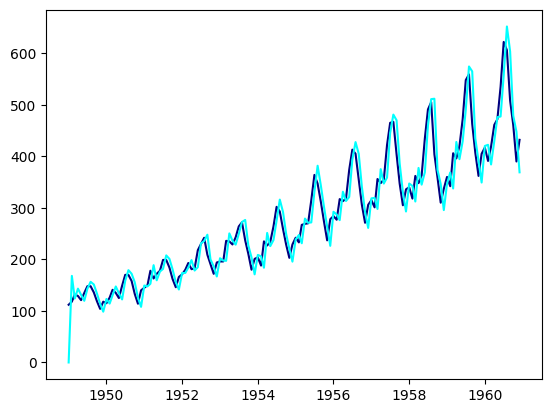

In [50]:
plt.plot(ts, color = 'navy')
plt.plot(results_pass.fittedvalues, color = 'aqua')

In [41]:
mean_squared_error(ts, results_pass.fittedvalues.dropna(), squared = False)

C:\Users\trucn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(33.72354442420133)

RMSE ≈ 33.72